<a href="https://colab.research.google.com/github/ngolemai020405/Tuan5/blob/main/Tuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

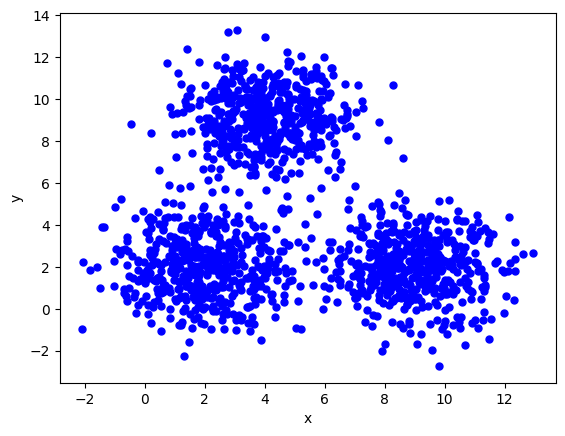

Init centers:
 [[-0.6839726   0.76978632]
 [ 8.26613526  0.3838513 ]
 [11.07129182  3.49204044]]


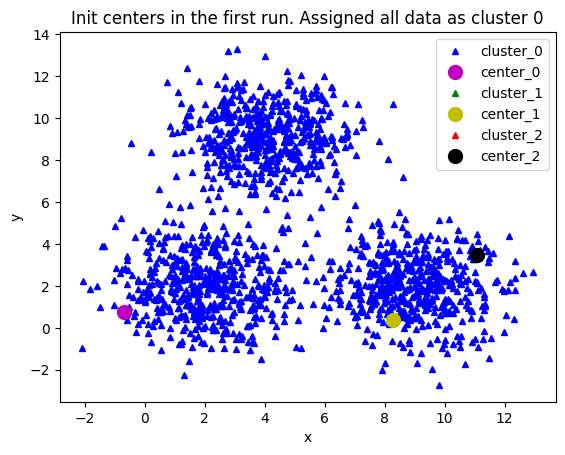

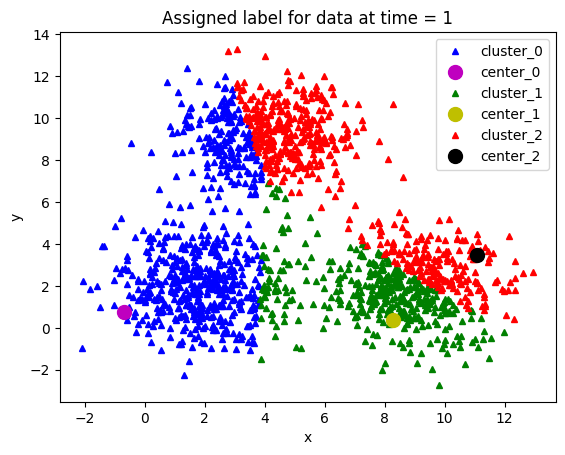

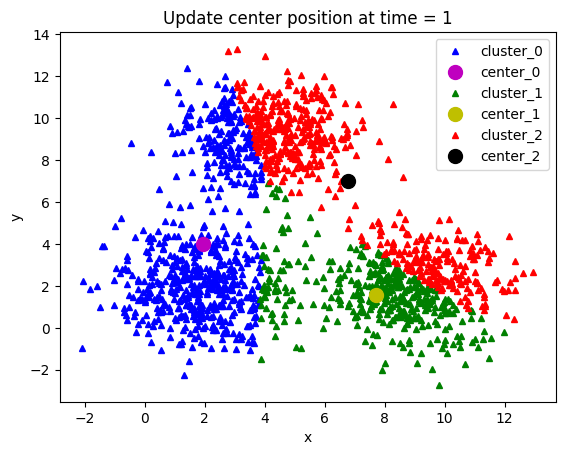

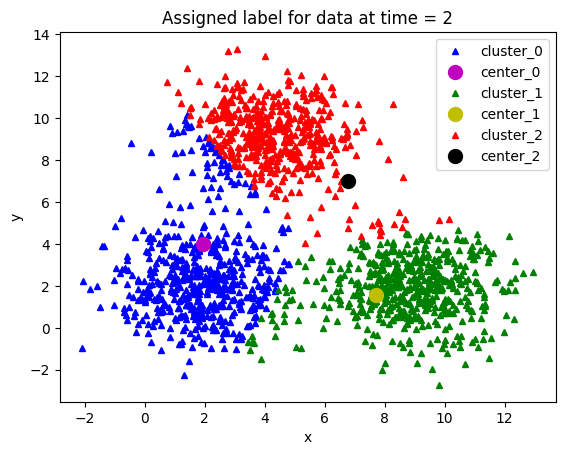

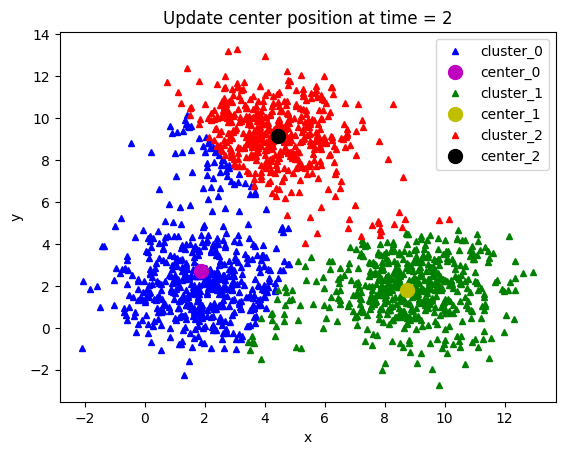

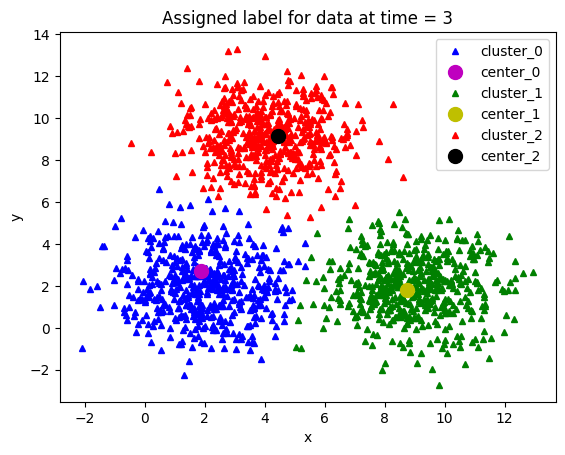

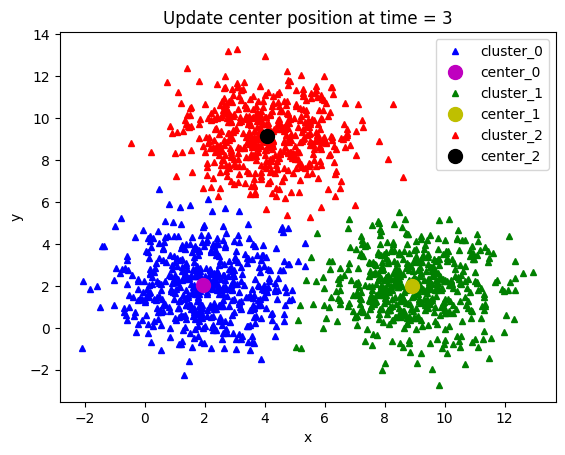

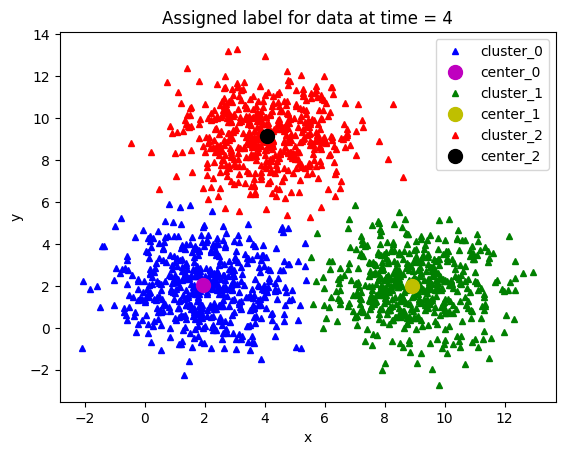

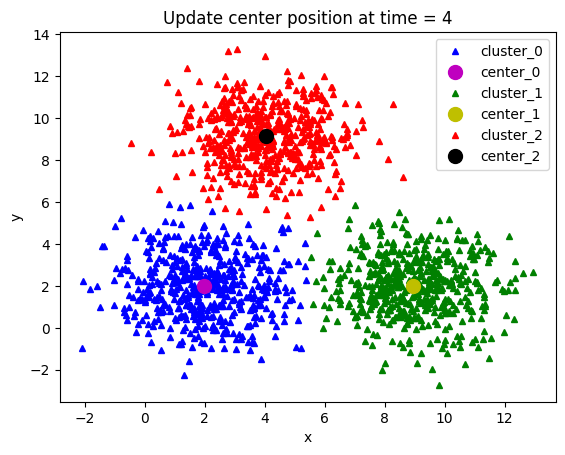

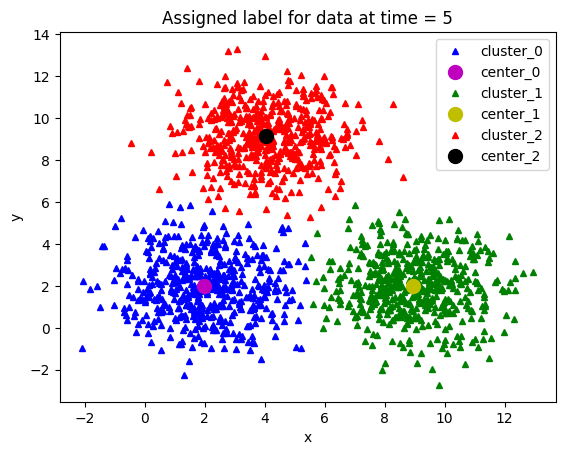

Done! Kmeans has converged after 4 iterations
Final centers:
 [[1.9896169  1.98052731]
 [8.95402868 2.00053895]
 [4.05695957 9.14788042]]


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3

X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis=0)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5)
plt.show()

def kmeans_init_centers(X, n_cluster):
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        Xk = X[labels == k, :]
        centers[k, :] = np.mean(Xk, axis=0)
    return centers

def kmeans_has_converged(centers, new_centers):
    return set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers])

def kmeans_visualize(X, centers, labels, n_cluster, title):
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)

    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    for i in range(n_cluster):
        data = X[labels == i]
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^',
                 markersize=4, label='cluster_' + str(i))
        plt.plot(centers[i][0], centers[i][1], plt_colors[i + 4] + 'o',
                 markersize=10, label='center_' + str(i))

    plt.legend()
    plt.show()

def kmeans(init_centers, init_labels, X, n_cluster):
    centers = init_centers
    labels = init_labels
    times = 0

    while True:
        labels = kmeans_predict_labels(X, centers)
        kmeans_visualize(X, centers, labels, n_cluster,
                         'Assigned label for data at time = ' + str(times + 1))

        new_centers = kmeans_update_centers(X, labels, n_cluster)

        if kmeans_has_converged(centers, new_centers):
            break

        centers = new_centers
        kmeans_visualize(X, centers, labels, n_cluster,
                         'Update center position at time = ' + str(times + 1))
        times += 1

    return centers, labels, times

init_centers = kmeans_init_centers(X, n_cluster)
print("Init centers:\n", init_centers)

init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster,
                 'Init centers in the first run. Assigned all data as cluster 0')

centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)
print('Done! Kmeans has converged after', times, 'iterations')
print('Final centers:\n', centers)
